## Mall Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"D:\ML\Mall_Customers.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
from warnings import filterwarnings
filterwarnings("ignore")

## Basic Data Quality Check

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()  # checking null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

## Data

In [10]:
x =  df[[ 'Annual Income (k$)' ,'Spending Score (1-100)' ]]

In [11]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [12]:
x.columns  =  ['Annual Income' , 'Spending Score ']

In [13]:
x.columns

Index(['Annual Income', 'Spending Score '], dtype='object')

## EDA - data visualization

<Axes: xlabel='Annual Income', ylabel='Spending Score '>

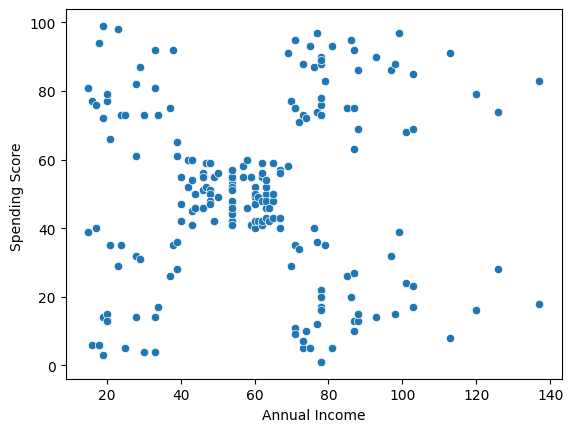

In [14]:
sns.scatterplot(data  = x  ,  x  = 'Annual Income'  , y  =  'Spending Score ' )

## Create Pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [16]:
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),   
    ('scaler',StandardScaler())             
])


In [17]:
## Apply pipeline  to  data
x_scaled = num_pipeline.fit_transform(x)

In [18]:
x_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [19]:
## Convert into DataFrame
x_scaled =  pd.DataFrame(x_scaled  )

In [20]:
num_pipeline.get_feature_names_out()

array(['Annual Income', 'Spending Score '], dtype=object)

In [21]:
x_scaled.columns  = x.columns

In [22]:
x_scaled.columns

Index(['Annual Income', 'Spending Score '], dtype='object')

In [23]:
x_scaled.head()

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


<Axes: xlabel='Annual Income', ylabel='Spending Score '>

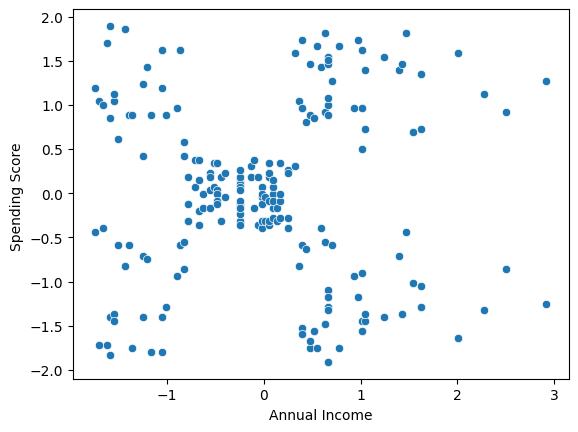

In [24]:
sns.scatterplot(data = x_scaled  , 
                x  = 'Annual Income' ,
                y = 'Spending Score ')

In [25]:
###  kmeans model fitting
from sklearn.cluster  import KMeans

In [26]:

kmean  =  KMeans(n_clusters  =4 )

In [27]:
kmean.fit(x_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [28]:

lb =  kmean.labels_
lb

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

<Axes: xlabel='Annual Income', ylabel='Spending Score '>

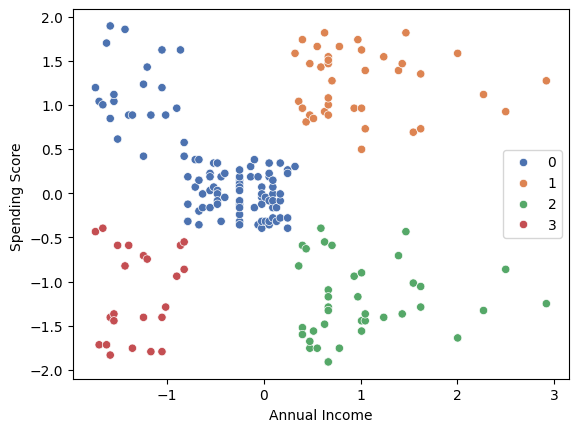

In [29]:
sns.scatterplot(data = x_scaled  , 
                x  = 'Annual Income' ,
                y = 'Spending Score ' , hue  =  lb  , palette =  'deep')

In [30]:
kmean.inertia_

108.92131661364355

In [31]:
k  =  range(2  , 15)
inertia  =  []
for  i in range(2, 15):
    kmean  =  KMeans(n_clusters  =  i)
    kmean.fit(x_scaled)
    inertia.append(kmean.inertia_)

In [32]:
inertia

[271.7037332940275,
 157.70400815035947,
 108.92131661364355,
 65.57885579985049,
 57.381747460227864,
 46.82157928700842,
 43.60102664657473,
 32.79861308516695,
 38.250888046229875,
 26.711354595870766,
 24.867144279512758,
 21.59543183742443,
 20.61878293955203]

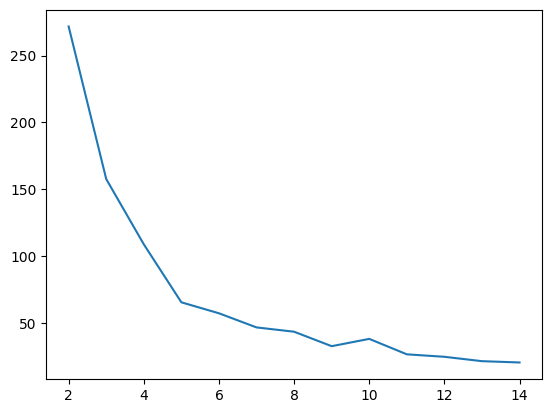

In [33]:

plt.plot(k ,  inertia)

##  yellobrick

In [34]:
%pip install  yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [35]:
from yellowbrick.cluster import kelbow_visualizer



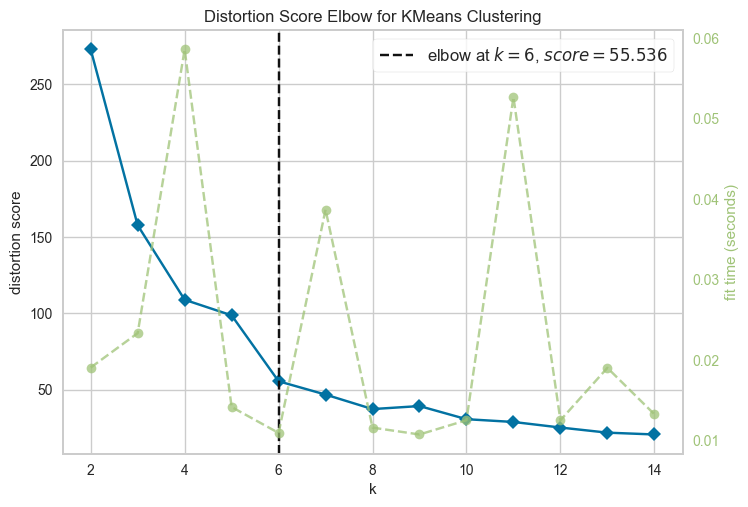

,estimator,KMeans(n_clusters=14)
,ax,<Axes: title=...ortion score'>
,k,"range(2, 15)"
,metric,'distortion'
,distance_metric,'euclidean'
,timings,True
,locate_elbow,True
,n_clusters,14
,init,'k-means++'
,n_init,'auto'
,max_iter,300


In [36]:
kelbow_visualizer(KMeans() ,  
                x_scaled  , 
                k  =  range(2 , 15))

In [37]:

%pip install setuptools

Note: you may need to restart the kernel to use updated packages.


In [38]:
%pip install setuptools
%pip install distutils


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [39]:
%pip install -U yellowbrick==1.5.post1


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement yellowbrick==1.5.post1 (from versions: 0.1, 0.3a1, 0.3.1, 0.3.2, 0.3.3, 0.4, 0.4.1, 0.4.2, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9.1, 1.0, 1.0.post1, 1.0.1, 1.1, 1.2, 1.2.1, 1.3, 1.3.post1, 1.4, 1.5)
ERROR: No matching distribution found for yellowbrick==1.5.post1


In [40]:
%pip install git+https://github.com/DistrictDataLabs/yellowbrick.git


  Cloning https://github.com/DistrictDataLabs/yellowbrick.git to c:\users\vaishnavi rayphale\appdata\local\temp\pip-req-build-uxxqdi7c
  Resolved https://github.com/DistrictDataLabs/yellowbrick.git to commit f7a8e950bd31452ea2f5d402a1c5d519cd163fd5
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/DistrictDataLabs/yellowbrick.git 'C:\Users\VAISHNAVI RAYPHALE\AppData\Local\Temp\pip-req-build-uxxqdi7c'
